In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2023-11-30 00:23:44.142655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


As usual, let's have a quick look at our dataset.

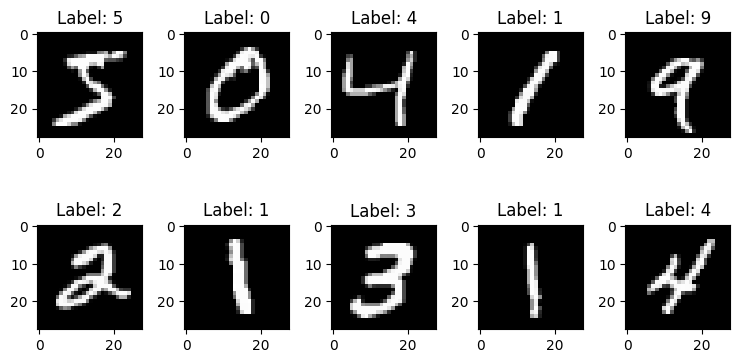

(28, 28)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num_row = 2
num_col = 5
# Plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

print(x_train[1].shape)

We now define our neural network: 
- A sequence of layers which take as input 28x28 images which is flattened to a 1-dimensional array of size 784.
- A dense intermediate layer with a ReLU activation
- A dropout rate of 0.2
- Finally, a dense output layer of size 10 (for each digit)

In [3]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

We test the prediction of our (untrained) model on the first element of our training sample.

In [4]:
predictions = model1(x_train[:1]).numpy()
print( predictions )

[[-0.34189275 -0.12564301  0.12309244 -0.5786574   0.7665484  -0.7727362
  -0.7047831  -0.6634217  -0.06281115 -0.06915698]]


The `tf.nn.softmax` function converts these logits to "probabilities" for each class.

In [5]:
print( tf.nn.softmax(predictions).numpy() )

[[0.08091699 0.10045136 0.12881908 0.06385783 0.2451487  0.05259286
  0.05629094 0.05866803 0.1069654  0.10628877]]


We define our *loss* function and use it on our (untrained) model. This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.log(1/10) ~= 2.3.

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print (loss_fn(y_train[:1], predictions).numpy())


2.945175


Let us now compile, using the ADAM optimiser and an accuracy metric, and train (fit) our model for 5 epochs.

In [7]:
model1.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1430 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1087 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0898 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0766 - accuracy: 0.9762


We can now evaluate the accuracy of the model for our testing dataset.

The image classifier is now trained to ~98% accuracy on this dataset.

Try increasing the number of epochs and see if it has any effect.

In [8]:
model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0720 - accuracy: 0.9782 - 502ms/epoch - 2ms/step


[0.07196198403835297, 0.9782000184059143]

One can obtain a *probability model* by wrapping the model around a softmax function.

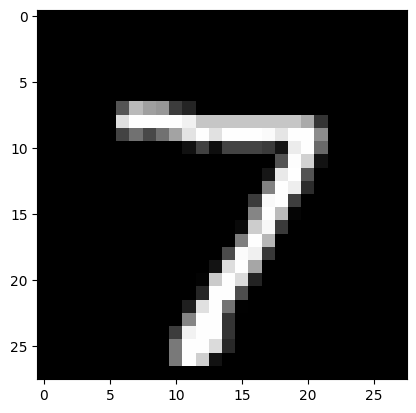

Predicted number is 7


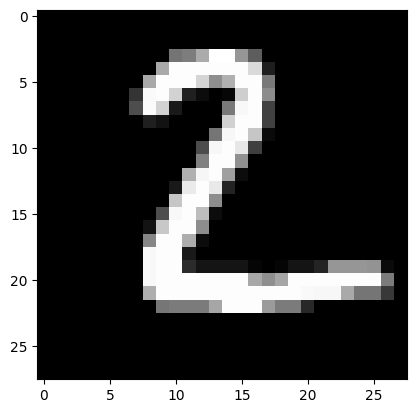

Predicted number is 2


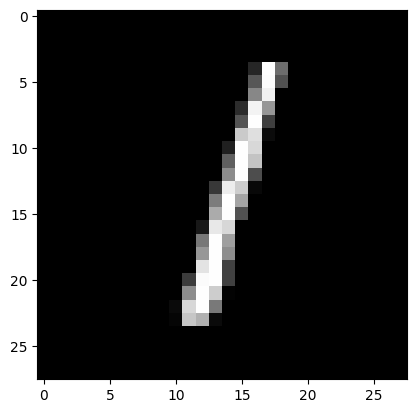

Predicted number is 1


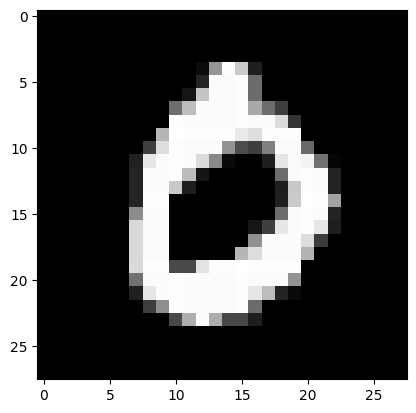

Predicted number is 0


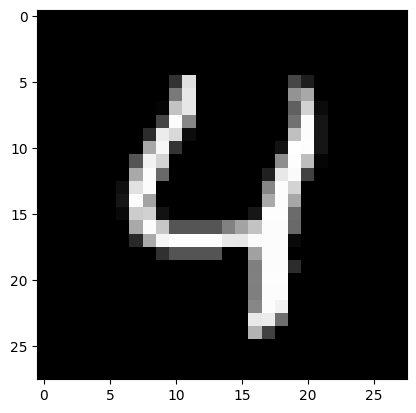

Predicted number is 4


In [9]:
probability_model = tf.keras.Sequential([
  model1,
  tf.keras.layers.Softmax()
])

for i in range(0,5):
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.imshow(x_test[i], cmap='gray')
  plt.show()
  mod_output = probability_model(x_test[i:i+1])
  print("Predicted number is", np.argmax(mod_output))


This last snippet allows comparing the prediction with the actual value

In [10]:
for i, p in enumerate(model1.predict(x_test)):
  print (y_test[i], np.argmax(p), y_test[i] == np.argmax(p))
  if i > 20: break

313/313 [==============================] - 0s 1ms/step
7 7 True
2 2 True
1 1 True
0 0 True
4 4 True
1 1 True
4 4 True
9 9 True
5 6 False
9 9 True
0 0 True
6 6 True
9 9 True
0 0 True
1 1 True
5 5 True
9 9 True
7 7 True
3 3 True
4 4 True
9 9 True
6 6 True



We can also train, evaluate and fit a new model `model2` with different settings for comparison.

Have fun playing with the parameters.


In [11]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=5)

model2.evaluate(x_test,  y_test, verbose=2)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2830 - accuracy: 0.9179
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1335 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0990 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0811 - accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0676 - accuracy: 0.9789
313/313 - 0s - loss: 0.0737 - accuracy: 0.9777 - 456ms/epoch - 1ms/step


[0.07373460382223129, 0.9776999950408936]